# Reminder workflow

<img src="images/Screenshot 2025-01-22 alle 17.50.35.png" />


# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wheter or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Dati dei parametri clinici di un paziente, possiamo prevedere se avrà o meno un attacco di cuore?

## 2. Data
A data dictionary describes the data you're dealing with.

Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

https://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation
> Se riusciamo a raggiungere una precisione (accuracy) del 95% nel prevedere se un paziente ha o meno una malattia cardiaca durante la prova di concetto, porteremo avanti il ​​progetto.

## 4. Features
**Create a data dictionary**
Possiamo crearlo da soli, oppure consultare un esperto del settore, per capire cosa significano nello specifico le varie feature e quali sono realmente utili e quali potrebbero essere eliminate.

Nel dataset, dalla documentazione da cui lo abbiamo preso, scopriamo che di 76 attributi ne è stato usato un subset di 14

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, matplotlib and Numpy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# we want our plot to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Lear
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape #(rows, columns)

(303, 14)

## Data Exploration (Exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [9]:
# Let' s find out how many of each class there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

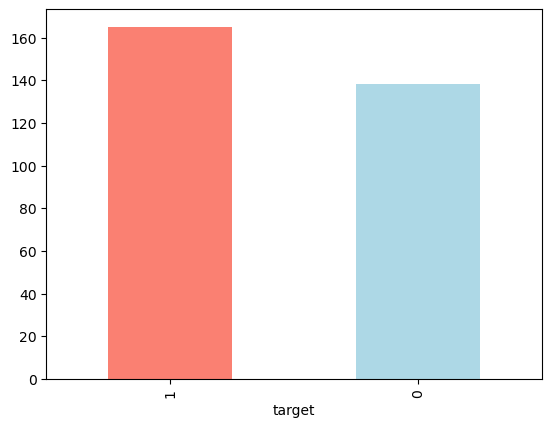

In [10]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Hear disease Frequency according to sex

dove sex - (1 = male; 0 = female)

In [3]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [4]:
# Compare target column to sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


**Stiamo creando delle intuizioni, facendo delle ipotesi** 

Basandoci solo su questi due dati, possiamo fare un inferenza, e dire che circa il 60% delle persone è a rischio di malattie cardiache. In quanto per le donne, basandoci solo sulla feature del sesso, e il target, circa il 72% ha una probabilità di averla, per gli uomini circa il 50%.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

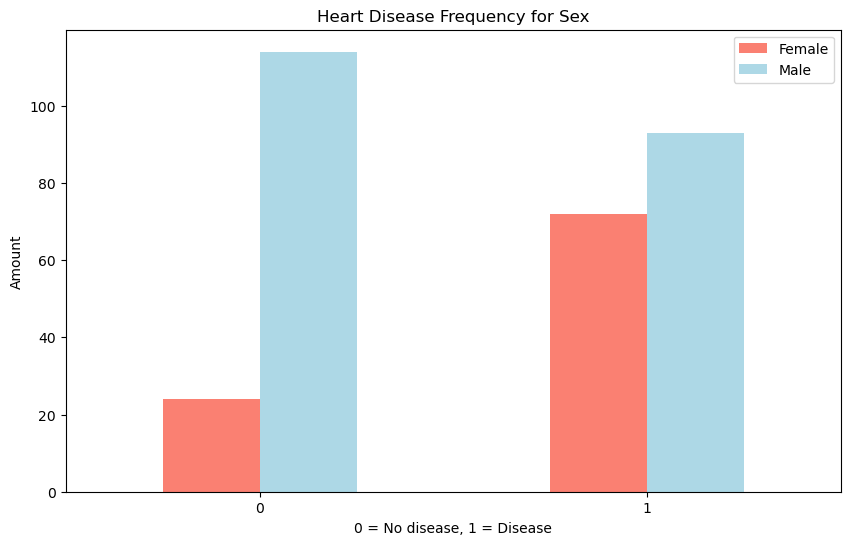

In [21]:
# Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0) # ruota i numeri 0 e 1 dell'asse x

In [22]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age vs Max Heart rate for heart disease

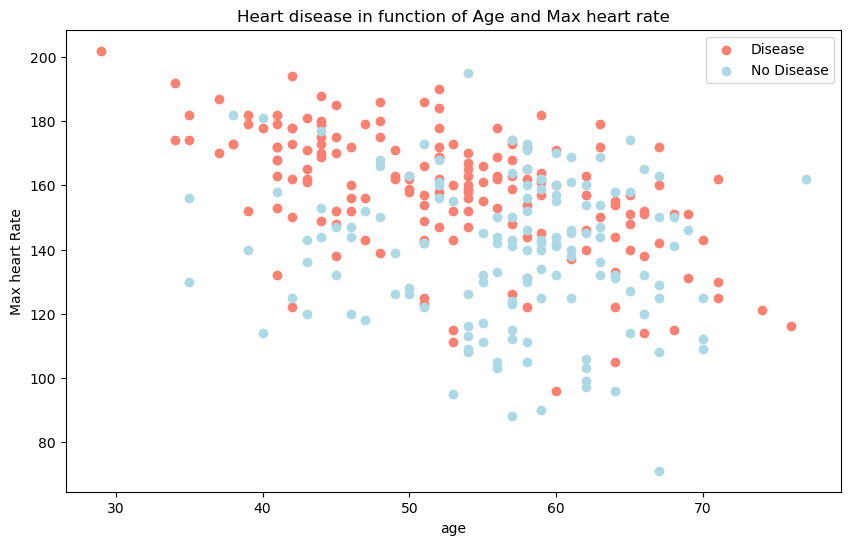

In [26]:
# create another figure
plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df.age[df.target==1],  # prendiamo tutte le età che hanno presentato distrurbi cardiaci
            df.thalach[df.target==1], # prendiamo tutti i valori di frequenza massima che hanno presentato disturbi cardiaci
            c="salmon")

# scatter with negative example

plt.scatter(df.age[df.target==0],  # prendiamo tutte le età che non hanno presentato distrurbi cardiaci
            df.thalach[df.target==0], # prendiamo tutti i valori di frequenza massima che non hanno presentato disturbi cardiaci
            c="lightblue")

# Add some helpful info
plt.title("Heart disease in function of Age and Max heart rate")
plt.xlabel("age")
plt.ylabel("Max heart Rate")
plt.legend(["Disease", "No Disease"])

<Axes: ylabel='Frequency'>

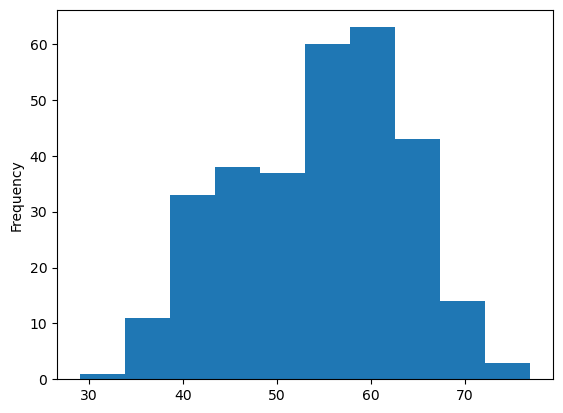

In [28]:
# Non salta nulla all'occhio, a parte un trend in diminuizione della frequenza cardiaca con l'avanzare dell'età
# Possiamo provare a controllare la distribuzione dell'età, che molto probabilimente sarà una normal distribution (a campana)
df.age.plot.hist()

### Heart Disease Frequency per Chest Pain type
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [29]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Questo tipo di confronti è utile non per trovare immediatamente risposte, ma per trovare domande da poter fare a nostra volta o a un esperto del settore o facendo ulteriori ricerche

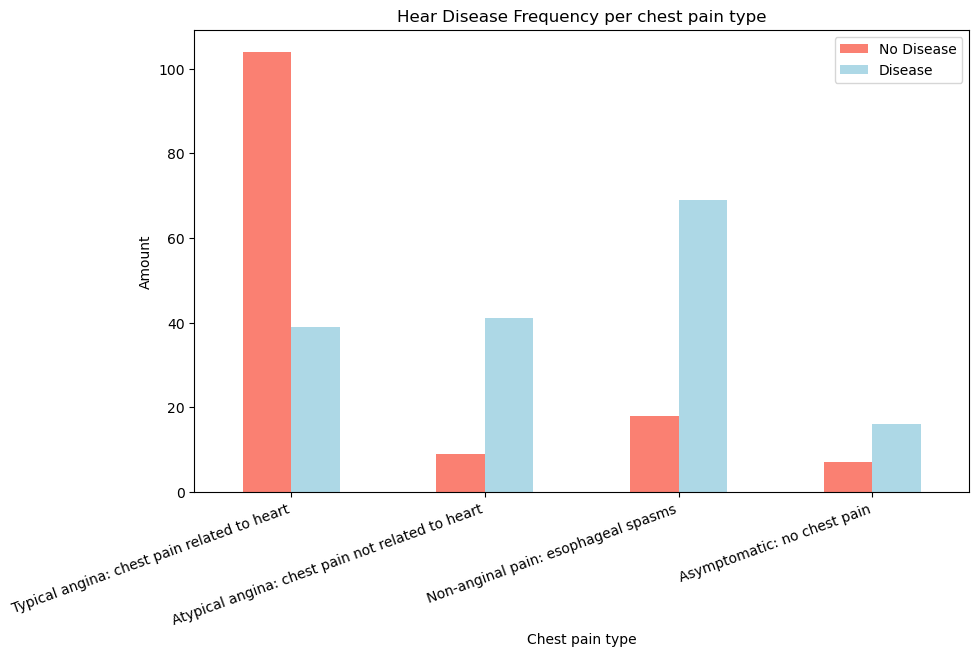

In [37]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Hear Disease Frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
chest_pain_labels = [
    "Typical angina: chest pain related to heart",
    "Atypical angina: chest pain not related to heart",
    "Non-anginal pain: esophageal spasms",
    "Asymptomatic: no chest pain"
]
plt.xticks(ticks=range(4), labels=chest_pain_labels, rotation=20, ha="right");

Adesso vogliamo costruire una matrice di correlazione per vedere se le nostre variabili indipendenti hanno un qualche tipo di rapporto / influenza l'una sull'altra

In [38]:
# Make a correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

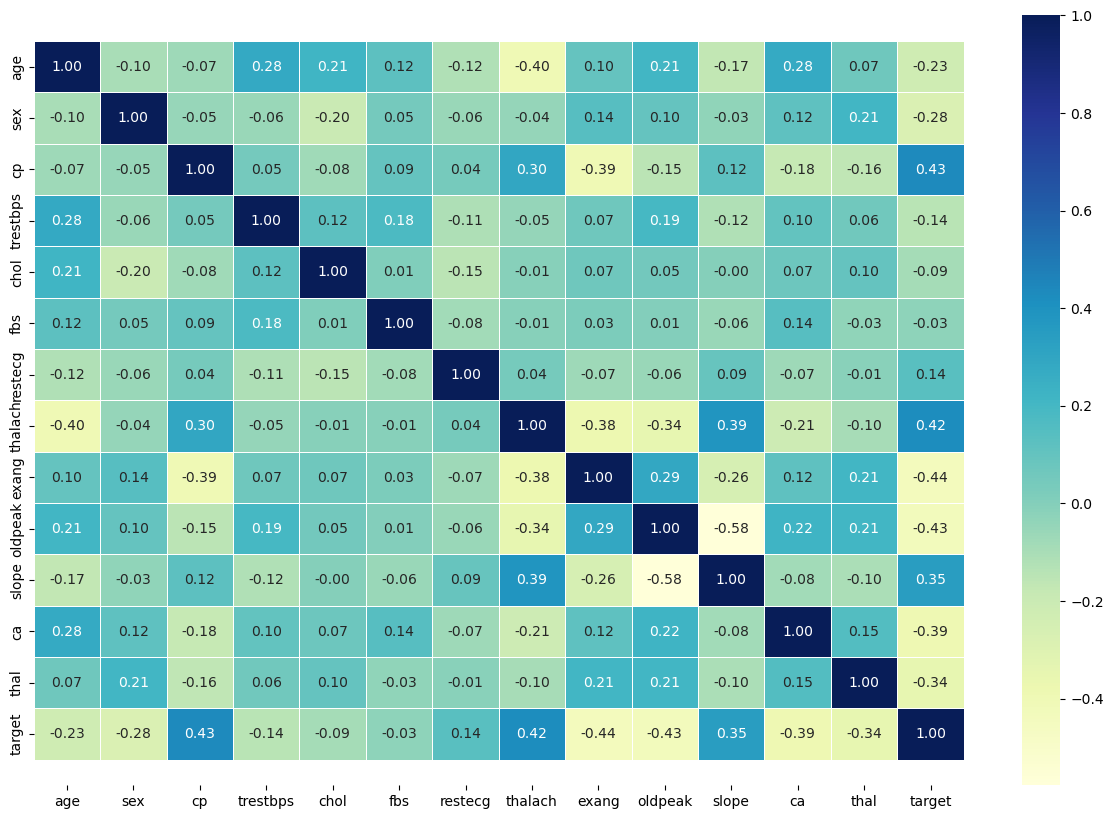

In [43]:
# let's make out correlation matrix a little prettier

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [4]:
# Split data into train and test sets
np.random.seed(42)

# Split ino train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [7]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [8]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Ora che abbiamo i dati divisi in train e test set, è il momento di costruire un machine learning model.

Lo alleneremo (trovare i patterns) sul training set. 

E lo testermo (usando i patterns trovati) sul test set.

Useremo 3 modelli differenti di machine learning:

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier


In [5]:
# Creare un dizionario contenente i modelli
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Creare una funzione che fa il fit e lo score dei modelli
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set Random Seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the date
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [6]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test= X_test,
                            y_train=y_train,
                            y_test= y_test)
model_scores

/opt/miniconda3/envs/heartdisease/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

<Axes: >

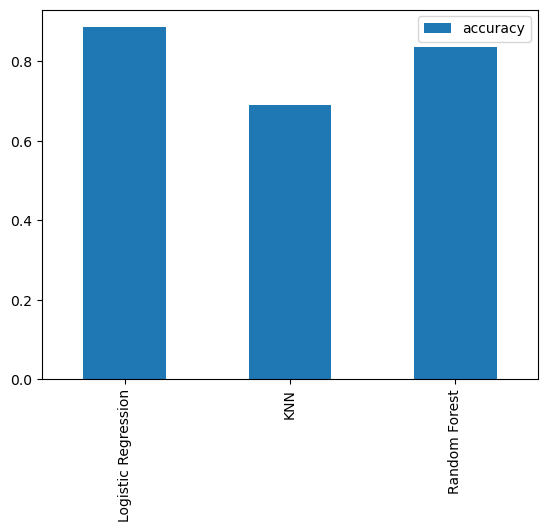

In [12]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

Ora abbiamo il nostro modello base... e sappiamo che le prime predizioni non sono sempre ciò su cui dovrebbo basare i prossimi steps. Cosa dovremmo fare adesso:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)
### Hyper parameter tuning (by hand)

In [7]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN istance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [14]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [15]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


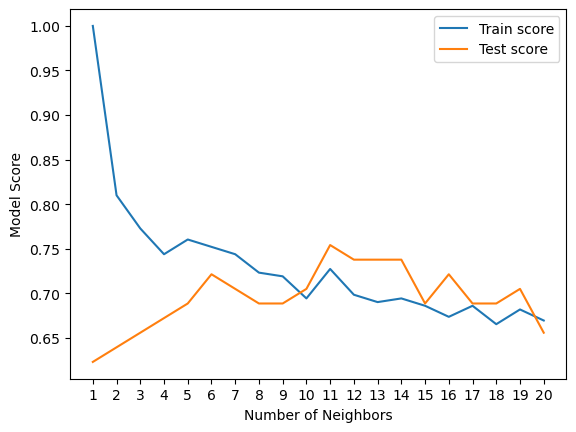

In [8]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


## Hyperparameter tuning with RandomizedSearchCV
Andremo a sistemare:
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [9]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver":["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth":[None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

Ora che abbiamo le griglie dei iperparametri impostate per ognuno dei nostri modelli, useremo RandomizedSearchCV

In [10]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random Hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [19]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [20]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Ora che abbiamo fatto il tuning sul modello LogisticRegression(), faremo la stessa cosa per il modello RandomForestClassifier()

In [11]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random Hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [22]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [23]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [12]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

1. By hand
2. RandomizedSearchCV
3. GridSearchCV

### Hyperparameter Tuning With GridSearchCV

Visto che il nostro modello LogisticRegression da il risultato migliore, proveremo a migliorarlo usando GridSearchCV

In [13]:
# Different Hyperparameters for out LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
              "solver":["liblinear"]}

# Setup Grid hyperparameter search for LogisticRegression (non usiamo iter, perchè prova tutte le combinazioni)
gs_log_red = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_red.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [14]:
# Check the best hyperparameters
gs_log_red.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [15]:
gs_log_red.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC curve
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, firt we need to make predictions.


In [16]:
# Make predictions with tuned model
y_preds = gs_log_red.predict(X_test)

In [29]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [30]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

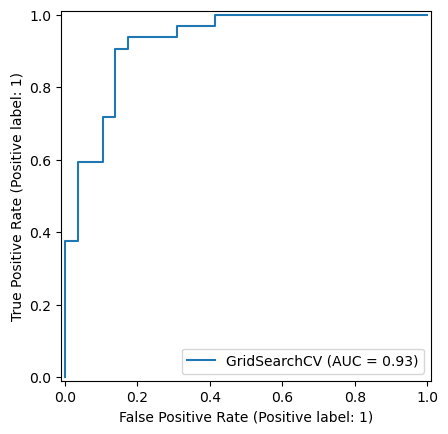

In [17]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_red, X_test, y_test)

In [34]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [35]:
sns

<module 'seaborn' from '/opt/miniconda3/envs/heartdisease/lib/python3.12/site-packages/seaborn/__init__.py'>

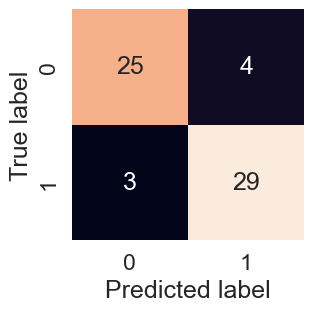

In [40]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nica looking confusion matrix using Seaborn's heatmap()

    """

    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test,y_preds)
    

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [41]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation 
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()` 

In [18]:
# Check best hyperparameters
gs_log_red.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [19]:
# Create a new classifier with the best parameters

In [21]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [26]:
# Cross validated Accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [27]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [29]:
# Cross-validated Precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [32]:
# Cross-validated Recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [33]:
# Cross-validate F1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

<Axes: title={'center': 'Cross-validated classification metrics'}>

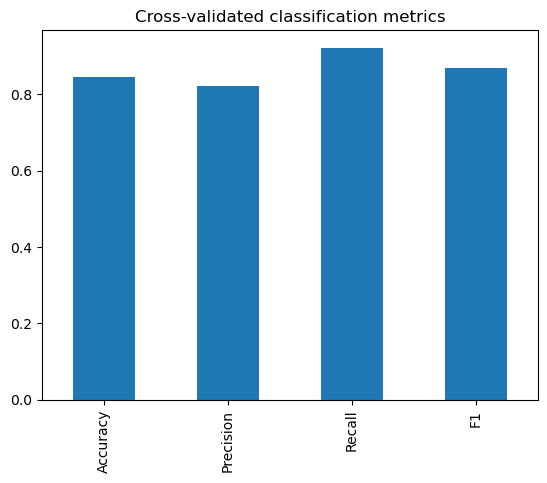

In [36]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1":cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False)

### Feature Importance
Feature importance is another way as asking, "Which features contributed most to the outcomes of the model and how did they contribute?

Find feature importance is differnt for each machine learning model. One wau to find feature importance is to search for "(Model Name) feature importance"

Let's find the feature importance for our LogisticRegression model.

In [39]:
# Fit an istance of Logistic Regression
gs_log_red.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [40]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [41]:
# Match coef's of feature to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

feature_dict

{'age': np.float64(0.0031672800489608455),
 'sex': np.float64(-0.8604464974271708),
 'cp': np.float64(0.6606704082728109),
 'trestbps': np.float64(-0.01156993196274824),
 'chol': np.float64(-0.0016637440923087717),
 'fbs': np.float64(0.04386107313075342),
 'restecg': np.float64(0.3127584615862929),
 'thalach': np.float64(0.02459361332045646),
 'exang': np.float64(-0.6041307948760266),
 'oldpeak': np.float64(-0.568628039197438),
 'slope': np.float64(0.4505162753782247),
 'ca': np.float64(-0.636098965095586),
 'thal': np.float64(-0.6766337239240338)}

<Axes: title={'center': 'Feature Importance'}>

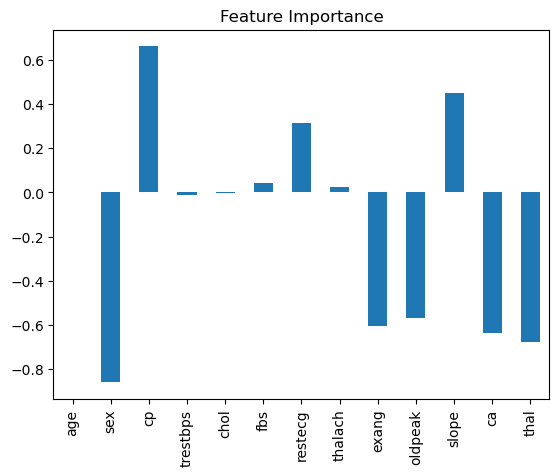

In [42]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [43]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [45]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...
* Could you collect more data?
* Cuold you try a better model? Like **CatBoost** or **XGBoost**?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric), how would you export it and share it with others?